<a href="https://colab.research.google.com/github/panimesh14/Autoencoders-Unsupervised-Learning/blob/main/Autoencoder_Model_for_Image_Denoising_and_Image_Reconstruction_of_Fashion_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Auto-Encoder for Image Denoising

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Data Loading
from tensorflow.keras.datasets import fashion_mnist
(Xtrain,ytrain),(Xtest,ytest)=fashion_mnist.load_data()

In [ ]:
num,m,n= Xtrain.shape

# Data Preparation

In [ ]:
#Scaling and Normalization
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(Xtrain[1])
Xtrain = Xtrain/(Xtrain.max())
#Xtest=scaler.transform(Xtest[:,:,1])

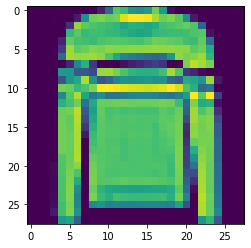

In [ ]:
plt.imshow(Xtrain[5])

# Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Reshape

In [ ]:
#Encoder
encoder=Sequential();
encoder.add(Flatten())
encoder.add(Dense(500, input_shape=[m,n], activation='relu'))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(300, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))
#encoder.compile(loss='mse',optimizer='adam')
encoder.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7feedb1b1490>>

In [ ]:
#Decoder
decoder=Sequential();
decoder.add(Dense(25, input_shape=[25], activation='relu'))
decoder.add(Dense(50, activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(300, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(500, activation='relu'))
decoder.add(Dense(m*n, activation='sigmoid'))
decoder.add(Reshape([m, n]))
decoder.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7feedb24cc90>>

In [ ]:
from tensorflow.keras.layers import GaussianNoise
noise=GaussianNoise(0.2);
noisy_samples=noise(Xtrain,training=True)

In [ ]:
#Auto-Encoder
ae=Sequential([encoder,decoder])
ae.compile(loss='binary_crossentropy',optimizer='adam')
ae.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7feedb1794d0>>

# Model Testing and Evaluation

In [ ]:
#Model Training
i=5;
ae.fit(Xtrain,Xtrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 36s 18ms/step - loss: 0.3421
Epoch 2/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3124
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3081
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3026
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2996
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2980
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2971
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2961
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2955
Epoch 10/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2947


In [ ]:
recon_image=ae.predict(Xtrain);#reconstructed images from autoencoder

In [ ]:
encoder.add(noise)
denoise_ae=Sequential([encoder,decoder])
denoise_ae.compile(loss='binary_crossentropy',optimizer='adam')
denoise_ae.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7feedb055d10>>

In [ ]:
denoise_ae.fit(Xtrain,Xtrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2915
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2911
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2909
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2905
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2907
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2905
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2899
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2900
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2896
Epoch 10/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2899


In [ ]:
denoised_sample=denoise_ae.predict(Xtrain)

Text(0.5, 1.0, 'Reconstructed Image')

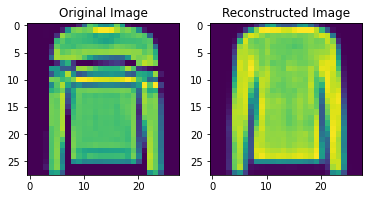

In [ ]:
#Original Images without noise
plt.subplot(1,2,1)
plt.imshow(Xtrain[i])
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(recon_image[i])
plt.title('Reconstructed Image')
#some quality gets deteriorated resulting in a loss

Text(0.5, 1.0, 'Autoencoder Denoised')

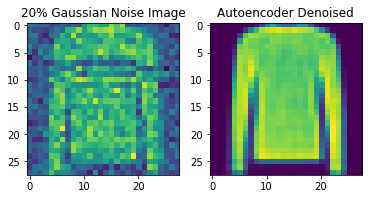

In [ ]:
plt.subplot(1,2,1)
plt.imshow(noisy_samples[i])
plt.title('20% Gaussian Noise Image')

plt.subplot(1,2,2)
plt.imshow(denoised_sample[i])
plt.title('Autoencoder Denoised')
# Random noise successfully filtered
# Quality not equal to original but still equivalent and better¹